# Artificial Intelligence / CNN - Decompossed
## Convolution via Python

### a. raw image

![raw](./imgs/two.orig.png)

### b. gather metadata - height, width, channel count

In [2]:
from PIL import Image
import numpy as np
import time

# get image meta-data, height, width, channels 

image_file = './imgs/two.orig.png'
height_raw = !identify -format '%h' {image_file}
height_raw = int(height_raw[0])
width_raw = !identify -format '%w' {image_file}
width_raw = int(width_raw[0])
has_alpha_channel = !identify -format '%A' {image_file}
has_alpha_channel = has_alpha_channel[0]
channel_cnt = 3
if has_alpha_channel:
    channel_cnt = 4
# only 3 channels, red, green, blue, no alpha
channel_size = height_raw * width_raw

print('image height  : ', height_raw)
print('image width   : ', width_raw)
print('channel count : ', channel_cnt)
print('chanel size   : ', channel_size)
print('total pixels  : ', channel_size * channel_cnt)

del has_alpha_channel
del channel_cnt
del channel_size

image height  :  582
image width   :  394
channel count :  4
chanel size   :  229308
total pixels  :  917232


### c. load image into list

In [3]:
# start with image, kept grey checkers to keep it interesting
pixels = list(Image.open(image_file).getdata())
pixels
# rgba - red, green, blue, alpha (all=255, zero transparency)

[(254, 254, 254, 255),
 (254, 254, 254, 255),
 (254, 254, 254, 255),
 (254, 254, 254, 255),
 (254, 254, 254, 255),
 (254, 254, 254, 255),
 (245, 245, 245, 255),
 (236, 236, 236, 255),
 (236, 236, 236, 255),
 (236, 236, 236, 255),
 (236, 236, 236, 255),
 (236, 236, 236, 255),
 (236, 236, 236, 255),
 (236, 236, 236, 255),
 (236, 236, 236, 255),
 (236, 236, 236, 255),
 (254, 254, 254, 255),
 (254, 254, 254, 255),
 (254, 254, 254, 255),
 (254, 254, 254, 255),
 (254, 254, 254, 255),
 (254, 254, 254, 255),
 (254, 254, 254, 255),
 (254, 254, 254, 255),
 (254, 254, 254, 255),
 (243, 243, 243, 255),
 (236, 236, 236, 255),
 (236, 236, 236, 255),
 (236, 236, 236, 255),
 (236, 236, 236, 255),
 (236, 236, 236, 255),
 (236, 236, 236, 255),
 (236, 236, 236, 255),
 (236, 236, 236, 255),
 (237, 237, 237, 255),
 (254, 254, 254, 255),
 (254, 254, 254, 255),
 (254, 254, 254, 255),
 (254, 254, 254, 255),
 (254, 254, 254, 255),
 (254, 254, 254, 255),
 (254, 254, 254, 255),
 (254, 254, 254, 255),
 (254, 254,

### d. extract color channels

green channel:


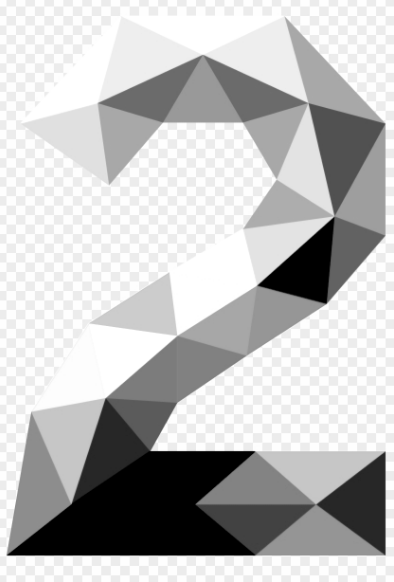

In [4]:
red = list()
green = list()
blue = list()
# will discard alpha channel
for quadruple in pixels:
    red.append(quadruple[0])
    green.append(quadruple[1])
    blue.append(quadruple[2])
# del pixels    
green_image = Image.new('L', (width_raw, height_raw))
green_image.putdata(green)
print('green channel:')
display(green_image)
len(green)

del image_file
del green_image
del red
del blue

### e. convolution = a very overloaded term
basically, applying a kernel matrix to a larger matrix to create feature map, aka convolution  

![edge](./imgs/convolution_edge_detect.png)

http://timdettmers.com/2015/03/26/convolution-deep-learning/

![animated](./imgs/animated_convolution.gif)

http://deeplearning.net/software/theano_versions/dev/tutorial/conv_arithmetic.html

### f. python convolution - simple pooling example

In [5]:
def apply_simple_kernel_func(mat, w, kernel_funct):
    
    # determine height
    h=(int)(len(mat)/w)
    
    # list for convolution
    new_image = list()
    
    # slide window over matrix
    for i,g in enumerate(mat):
    
        # out of bounds?
        if i >= (w*(h-1)): 
            break
        if i!= 0 and (i+1) % w == 0:
            continue
        
        # grab window of pixels
        window = [mat[i], mat[(i+1)], mat[(i+w)], mat[(i+1+w)]]
        
        # apply function
        output = kernel_funct(window)
        
        # add pixel to convolution
        new_image.append(output)
    return new_image

#### recursify the simple pooling function

In [6]:
# recursify the function
def recurse_simple_kernel_func(mat, width, kernel_funct, loop_cnt):
    m = mat
    w = width
    for i in range(loop_cnt):    
        m = apply_simple_kernel_func(m, w, kernel_funct)
        w = w - 1
    return m

#### max pooling example

seconds taken :  6.065


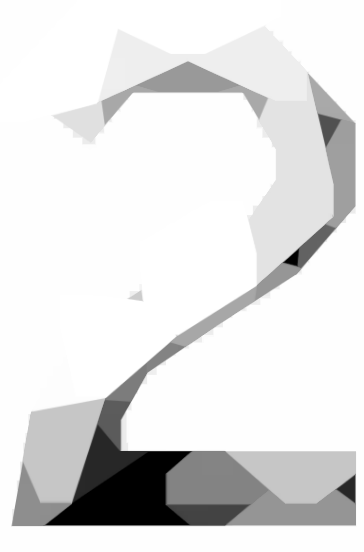

In [7]:
recurse_cnt = 30
start = time.time()
green_pooled = recurse_simple_kernel_func(green, width_raw, max, recurse_cnt)
end = time.time()
time_taken = round((end - start),3)
print('seconds taken : ',time_taken)

new_width = width_raw-recurse_cnt
g_img = Image.new('L', (new_width, (int)(len(green_pooled)/new_width)))
g_img.putdata(green_pooled)
display(g_img)

#### mean pooling example

This is mostly to show how long this takes in Python.  It could probably be faster if parallelzed with threading, but that would require even more coding and slighty more complexity.

seconds taken :  216.143


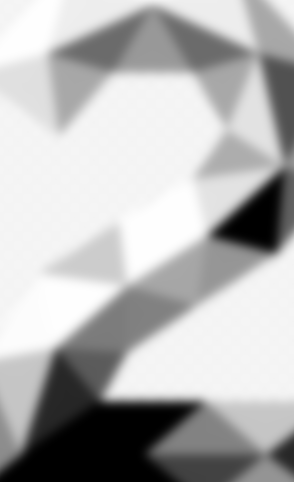

In [8]:
recurse_cnt = 100
start = time.time()
green_pooled = recurse_simple_kernel_func(green, width_raw, np.mean, recurse_cnt)
end = time.time()
time_taken = round((end - start),3)
print('seconds taken : ',time_taken)

new_width = width_raw-recurse_cnt
g_img = Image.new('L', (new_width, (int)(len(green_pooled)/new_width)))
g_img.putdata(green_pooled)
display(g_img)

![cpu load](./imgs/python_mean_pooling.png)